# Import MIS Data 

## Setup and Helper Functions

In [3]:
import re
import json

from pathlib import Path

import pandas as pd
import numpy as np
from scipy import signal

from fau_colors import cmaps
import biopsykit as bp
from empkins_io.sensors.mis import MisDataset

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib widget
%load_ext autoreload
%autoreload 2

In [4]:
plt.close("all")

palette = sns.color_palette(cmaps.faculties)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"

palette

[(0.0, 0.1843137254901961, 0.4235294117647059),
 (0.4666666666666667, 0.6235294117647059, 0.7098039215686275),
 (1.0, 0.7215686274509804, 0.10980392156862745),
 (0.0, 0.6392156862745098, 0.8784313725490196),
 (0.2627450980392157, 0.6901960784313725, 0.16470588235294117),
 (0.7843137254901961, 0.06274509803921569, 0.1803921568627451)]

In [6]:
data_path = sorted(Path("data").glob("*.mat"))[0]
data_path

PosixPath('data/2021-05-04_13-33-59_VP_01_rawdata.mat')

## Load Data

In [25]:
dataset = MisDataset.from_mat_file(data_path)

## Convert to DataFrame

### Configure Index

In [12]:
# index: sample counter
data = dataset.data_as_df()
data.head()

,I,Q,Respiration,Pulse,Respiration_States,Heartbeats,Heartsound_Quality
n_samples,,,,,,,
0,786.581039,-546.773911,-0.262284,0.028640,2,0,3.145307
1,786.559105,-546.808720,-0.262442,0.027996,2,0,3.145307
2,786.536217,-546.841145,-0.262600,0.027344,2,0,3.145307
3,786.502838,-546.876907,-0.262757,0.026683,2,0,3.145307
4,786.454678,-546.912193,-0.262913,0.026013,2,0,3.145307


In [14]:
# index: time in seconds since recording start
data = dataset.data_as_df(index="time")
data.head()

,I,Q,Respiration,Pulse,Respiration_States,Heartbeats,Heartsound_Quality
t,,,,,,,
0.0000,786.581039,-546.773911,-0.262284,0.028640,2,0,3.145307
0.0005,786.559105,-546.808720,-0.262442,0.027996,2,0,3.145307
0.0010,786.536217,-546.841145,-0.262600,0.027344,2,0,3.145307
0.0015,786.502838,-546.876907,-0.262757,0.026683,2,0,3.145307
0.0020,786.454678,-546.912193,-0.262913,0.026013,2,0,3.145307


In [15]:
# index: UTC time
data = dataset.data_as_df(index="utc_datetime")
data.head()

,I,Q,Respiration,Pulse,Respiration_States,Heartbeats,Heartsound_Quality
date,,,,,,,
2021-05-04 11:33:59+00:00,786.581039,-546.773911,-0.262284,0.028640,2,0,3.145307
2021-05-04 11:33:59.000499968+00:00,786.559105,-546.808720,-0.262442,0.027996,2,0,3.145307
2021-05-04 11:33:59.000999936+00:00,786.536217,-546.841145,-0.262600,0.027344,2,0,3.145307
2021-05-04 11:33:59.001499904+00:00,786.502838,-546.876907,-0.262757,0.026683,2,0,3.145307
2021-05-04 11:33:59.002000128+00:00,786.454678,-546.912193,-0.262913,0.026013,2,0,3.145307


In [16]:
# index: local time
data = dataset.data_as_df(index="local_datetime")
data.head()

,I,Q,Respiration,Pulse,Respiration_States,Heartbeats,Heartsound_Quality
date (Europe/Berlin),,,,,,,
2021-05-04 13:33:59+02:00,786.581039,-546.773911,-0.262284,0.028640,2,0,3.145307
2021-05-04 13:33:59.000499968+02:00,786.559105,-546.808720,-0.262442,0.027996,2,0,3.145307
2021-05-04 13:33:59.000999936+02:00,786.536217,-546.841145,-0.262600,0.027344,2,0,3.145307
2021-05-04 13:33:59.001499904+02:00,786.502838,-546.876907,-0.262757,0.026683,2,0,3.145307
2021-05-04 13:33:59.002000128+02:00,786.454678,-546.912193,-0.262913,0.026013,2,0,3.145307


## Extract Data

### Heart Rate

In [21]:
dataset.heart_rate(index="local_datetime")

,Heart_Rate,Heartsound_Quality,RR_Interval,R_Peak_Idx
date (Europe/Berlin),,,,
2021-05-04 13:34:00.214499840+02:00,52.933392,3.145307,1.1335,2429
2021-05-04 13:34:01.088499968+02:00,68.649886,3.145307,0.8740,4177
2021-05-04 13:34:02.219500032+02:00,53.050398,3.145307,1.1310,6439
2021-05-04 13:34:03.461999872+02:00,48.289738,3.145307,1.2425,8924
2021-05-04 13:34:04.464499968+02:00,59.850374,3.145307,1.0025,10929
...,...,...,...,...
2021-05-04 13:36:54.453500160+02:00,42.477876,0.000000,1.4125,350907
2021-05-04 13:36:55.349499904+02:00,66.964286,0.000000,0.8960,352699
2021-05-04 13:36:56.244999936+02:00,67.001675,0.000000,0.8955,354490


### Respiration

<AxesSubplot: xlabel='date (Europe/Berlin)'>

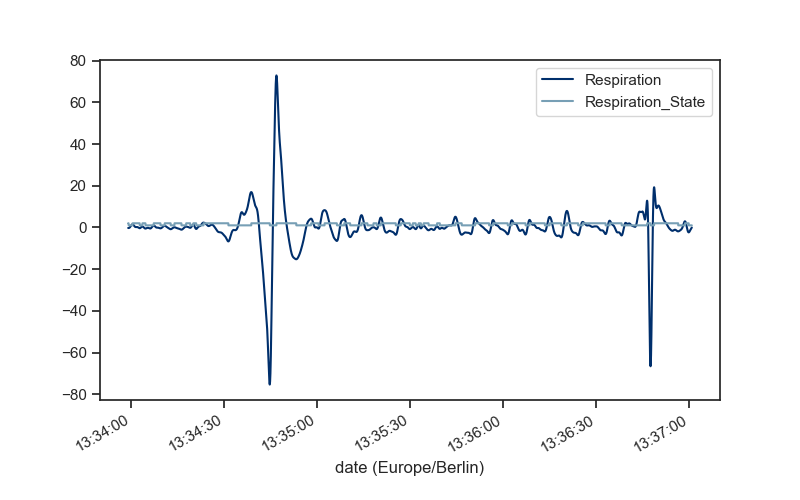

In [38]:
dataset.respiration(fs_out=100, index="local_datetime").plot()

## Select Specific Time Interval

### Time Stamps

In [41]:
data = dataset.data_as_df(index="local_datetime")

ts1 = data.index[34]
ts2 = data.index[10455]
print(ts1)
print(ts2)

2021-05-04 13:33:59.016999936+02:00
2021-05-04 13:34:04.227500032+02:00


In [42]:
data.loc[ts1:ts2]

,I,Q,Respiration,Pulse,Respiration_State,Heartbeats,Heartsound_Quality
date (Europe/Berlin),,,,,,,
2021-05-04 13:33:59.016999936+02:00,786.092758,-544.634342,-0.267366,0.005590,2,0,3.145307
2021-05-04 13:33:59.017499904+02:00,786.243916,-544.621944,-0.267506,0.005008,2,0,3.145307
2021-05-04 13:33:59.017999872+02:00,786.383629,-544.628620,-0.267645,0.004439,2,0,3.145307
2021-05-04 13:33:59.018500096+02:00,786.520481,-544.650555,-0.267784,0.003884,2,0,3.145307
2021-05-04 13:33:59.019000064+02:00,786.645412,-544.663429,-0.267923,0.003342,2,0,3.145307
...,...,...,...,...,...,...,...
2021-05-04 13:34:04.225500160+02:00,758.409977,-604.356766,-0.308914,-0.110932,2,0,3.145307
2021-05-04 13:34:04.226000128+02:00,758.367538,-604.264259,-0.309584,-0.111007,2,0,3.145307
2021-05-04 13:34:04.226500096+02:00,758.340836,-604.176998,-0.310253,-0.111082,2,0,3.145307


### Absolute Time

### Relative Time

In [43]:
data_slice.first("3s")

[autoreload of empkins_io.sensors.mis.mis failed: Traceback (most recent call last):
  File "/Users/Richer/Documents/PhD/Projects/EmpkinS/Code/empkins-d03-micro-analysis/.venv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/Richer/Documents/PhD/Projects/EmpkinS/Code/empkins-d03-micro-analysis/.venv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/Richer/opt/anaconda3/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/Richer/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/Richer/Documents/Ph

NameError: name 'data_slice' is not defined

## Plot Data

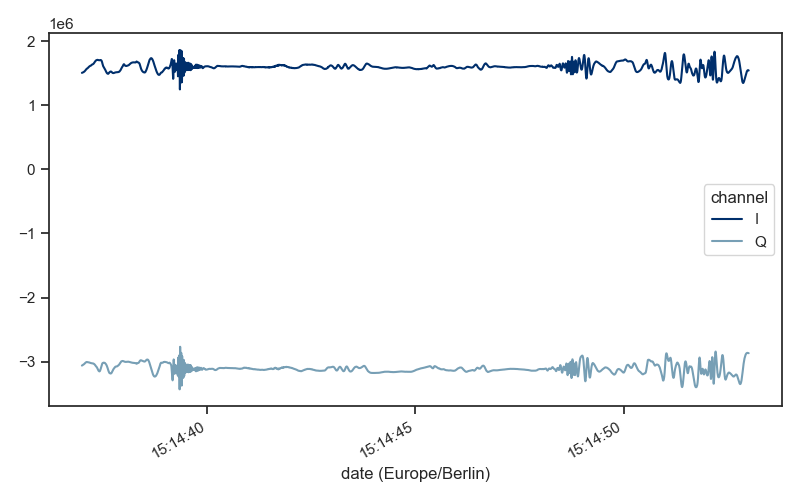

In [34]:
fig, ax = plt.subplots()

data_slice[["I", "Q"]].plot(ax=ax)

fig.tight_layout()

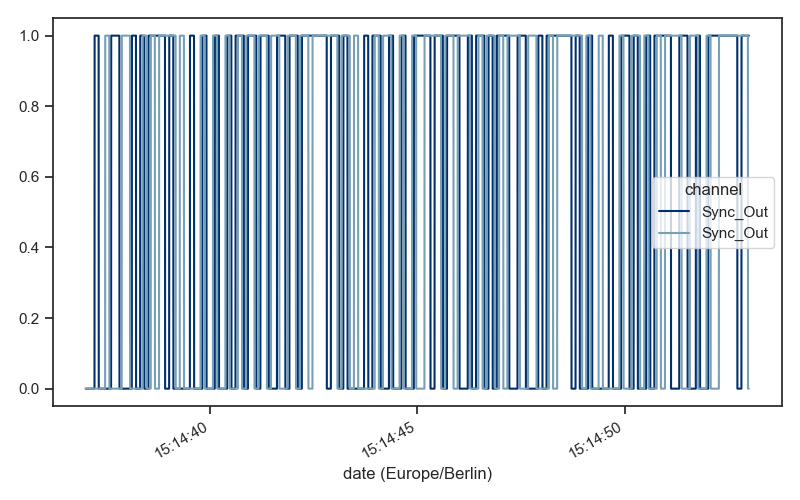

In [60]:
fig, ax = plt.subplots()

test1 = data_slice[["Sync_Out"]]

test2 = data_slice[["Sync_Out"]].copy()
test2 = test2.shift(500, fill_value=0)

test1.plot(ax=ax)
test2.plot(ax=ax)

fig.tight_layout()

In [72]:
n = len(test1)

corr = signal.correlate(test1, test2, mode='same') / np.sqrt(signal.correlate(test1, test1, mode='same')[int(n/2)] * signal.correlate(test2, test2, mode='same')[int(n/2)])

delay_arr = np.linspace(-0.5*n/1953.0, 0.5*n/1953.0, n)
delay_sec = delay_arr[np.argmax(corr)]

delay_sec * 1953.0

-499.5159937241849